In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
movies_metadata = catalog.load("movies_metadata")

print(movies_metadata.head())

[10/31/25 15:48:10] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=460106;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=583067;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

[10/31/25 16:03:25] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=735732;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=524170;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Accuracy: 0.6566233076718875

Clasificación:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69     11721
           1       0.66      0.58      0.62     10881

    accuracy                           0.66     22602
   macro avg       0.66      0.65      0.65     22602
weighted avg       0.66      0.66      0.65     22602



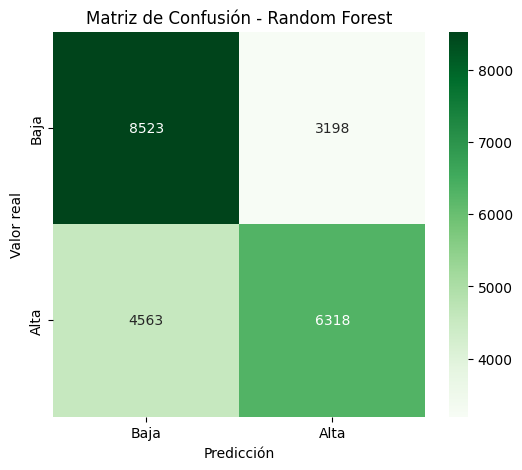

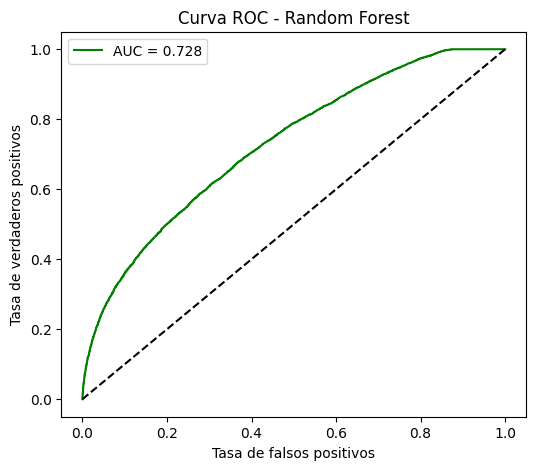

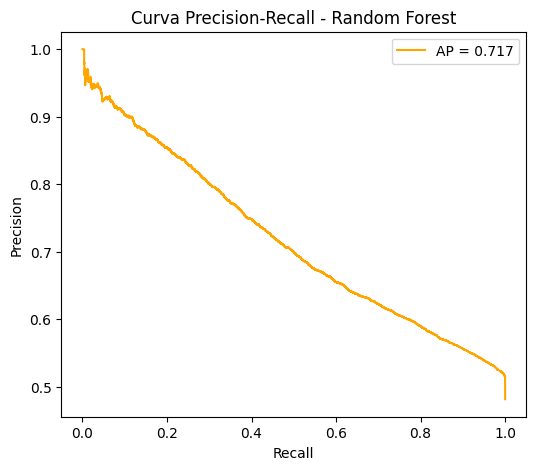

In [20]:
# Importaciones
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# 1️⃣ Crear la variable objetivo 'high_rating'
movies_metadata['high_rating'] = (movies_metadata['vote_average'] > 6).astype(int)

# 2️⃣ Seleccionar las variables más correlacionadas (sin incluir 'high_rating')
selected_features = ['runtime', 'popularity', 'vote_count', 'revenue', 'budget']
movies_metadata[selected_features] = movies_metadata[selected_features].apply(pd.to_numeric, errors='coerce')

# 3️⃣ Eliminar filas con valores nulos
movies_metadata = movies_metadata.dropna(subset=selected_features + ['high_rating'])

# 4️⃣ Definir X e y
X = movies_metadata[selected_features]
y = movies_metadata['high_rating']

# 5️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 6️⃣ Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7️⃣ Entrenar modelo Random Forest
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 8️⃣ Predicciones
y_pred = model.predict(X_test_scaled)
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# 9️⃣ Métricas de rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClasificación:\n", classification_report(y_test, y_pred))

# 🔟 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# 11️⃣ Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()

# 12️⃣ Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend()
plt.show()




📊 Top 8 variables más correlacionadas con 'vote_average':
high_rating    0.664936
runtime        0.158146
popularity     0.153334
vote_count     0.123651
revenue        0.083768
budget         0.072900
Name: vote_average, dtype: float64


[10/31/25 15:59:16] WARNING  C:\Users\ariel\AppData\Local\Temp\ipykernel_1444\3430411409.py:21:     warnings.py:110
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')                 
                                                                                                                   

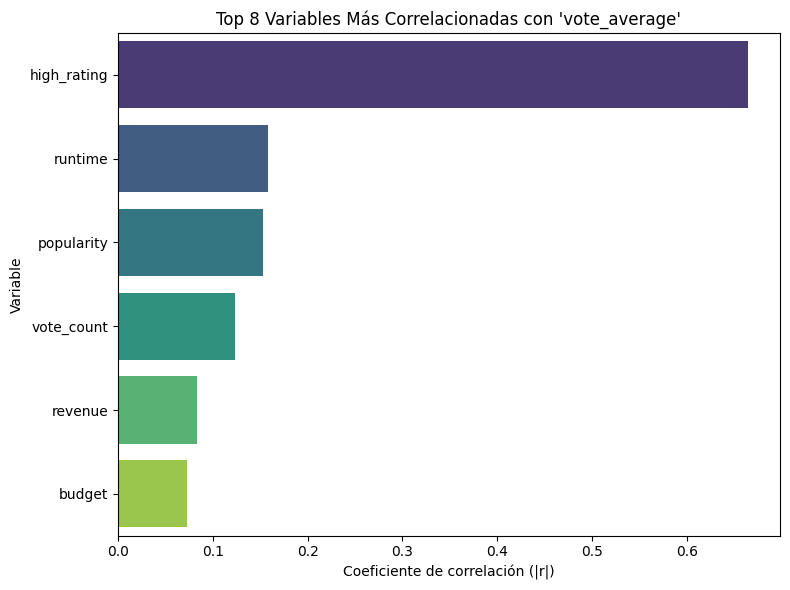

In [18]:
# 🔍 Correlación con 'vote_average'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener tu DataFrame 'movies_metadata'
# Selecciona solo las columnas numéricas
numeric_cols = movies_metadata.select_dtypes(include=['float64', 'int64']).columns

# Calcular correlaciones con 'vote_average'
corr = movies_metadata[numeric_cols].corr()['vote_average'].sort_values(ascending=False)

# Mostrar las 8 variables con mayor correlación (positiva o negativa)
top_corr = corr.drop('vote_average').abs().sort_values(ascending=False).head(8)

print("\n📊 Top 8 variables más correlacionadas con 'vote_average':")
print(top_corr)

# 🔧 Visualización
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top 8 Variables Más Correlacionadas con 'vote_average'")
plt.xlabel("Coeficiente de correlación (|r|)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()



In [4]:
# Revisar columnas
print(movies_metadata.columns)

# Crear main_genre
import ast

def get_main_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  # Convierte string a lista de diccionarios
        if isinstance(genres, list) and len(genres) > 0:
            return genres[0]['name']  # Tomamos el primer género como principal
        else:
            return None
    except:
        return None

movies_metadata['main_genre'] = movies_metadata['genres'].apply(get_main_genre)

# Revisar si se creó correctamente
print(movies_metadata[['genres', 'main_genre']].head())

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
                                              genres main_genre
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  Animation
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  Adventure
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...    Romance
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...     Comedy
4                     [{'id': 35, 'name': 'Comedy'}]     Comedy


[10/31/25 16:14:32] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=993552;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=752564;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy final: 0.650591748700365

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      4621
           1       0.66      0.58      0.62      4420

    accuracy                           0.65      9041
   macro avg       0.65      0.65      0.65      9041
weighted avg       0.65      0.65      0.65      9041



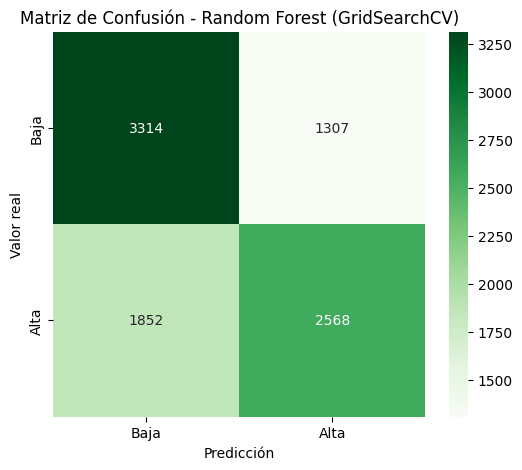

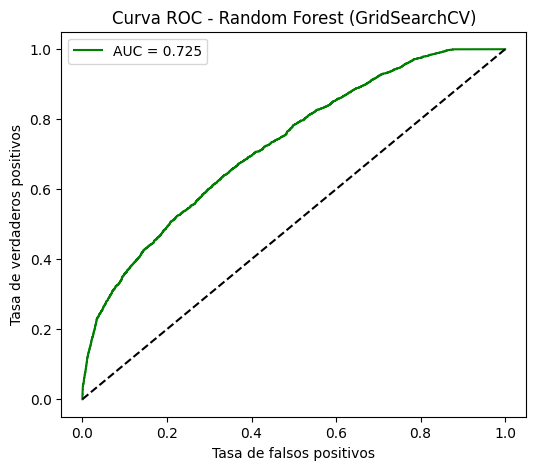

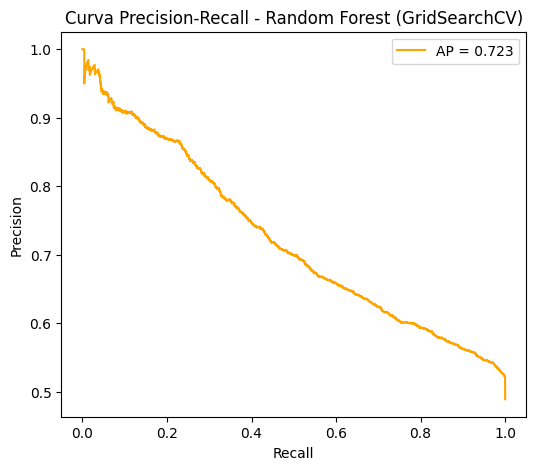


📊 Importancia de las variables:
     Variable  Importancia
2  vote_count     0.422307
0     runtime     0.284911
1  popularity     0.159466
4      budget     0.083885
3     revenue     0.049432


[10/31/25 16:31:29] WARNING  C:\Users\ariel\AppData\Local\Temp\ipykernel_1444\198882442.py:118:     warnings.py:110
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x='Importancia', y='Variable', data=importances,                        
                             palette='viridis')                                                                    
                                                                                                                   

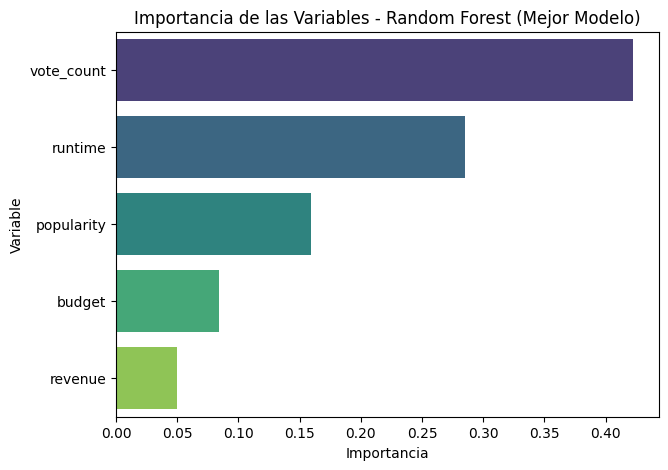

In [21]:
# Importaciones GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# 1️⃣ Crear la variable objetivo 'high_rating'
movies_metadata['high_rating'] = (movies_metadata['vote_average'] > 6).astype(int)

# 2️⃣ Seleccionar las variables más correlacionadas (sin incluir 'high_rating')
selected_features = ['runtime', 'popularity', 'vote_count', 'revenue', 'budget']
movies_metadata[selected_features] = movies_metadata[selected_features].apply(pd.to_numeric, errors='coerce')

# 3️⃣ Eliminar filas con valores nulos
movies_metadata = movies_metadata.dropna(subset=selected_features + ['high_rating'])

# 4️⃣ Definir X e y
X = movies_metadata[selected_features]
y = movies_metadata['high_rating']

# 5️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7️⃣ Definir modelo base
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 8️⃣ Definir grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# 9️⃣ Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# 🔟 Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# 11️⃣ Mostrar los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# 12️⃣ Modelo final con mejores parámetros
best_rf = grid_search.best_estimator_

# 13️⃣ Evaluación del modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test_scaled)
y_scores = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\nAccuracy final:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 🔟 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Random Forest (GridSearchCV)')
plt.show()

# 11️⃣ Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Random Forest (GridSearchCV)')
plt.legend()
plt.show()

# 12️⃣ Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest (GridSearchCV)')
plt.legend()
plt.show()

# 13️⃣ Importancia de las variables
importances = pd.DataFrame({
    'Variable': selected_features,
    'Importancia': best_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n📊 Importancia de las variables:")
print(importances)

plt.figure(figsize=(7,5))
sns.barplot(x='Importancia', y='Variable', data=importances, palette='viridis')
plt.title('Importancia de las Variables - Random Forest (Mejor Modelo)')
plt.show()


Conclusiones – Modelo Random Forest (Clasificación de Películas)
Resultados del Modelo

El modelo Random Forest, optimizado mediante GridSearchCV, obtuvo un rendimiento sólido y equilibrado en la predicción de si una película tiene una alta o baja puntuación (high_rating):

Accuracy: 65.06% – nivel aceptable de precisión general.

Precision: 64% para películas con baja puntuación, 66% para películas con alta puntuación.

Recall: 72% para clase 0 (baja puntuación) y 58% para clase 1 (alta puntuación).

F1-Score: 0.68 y 0.62 respectivamente, con un promedio general de 0.65.

Mejores parámetros encontrados:

criterion: 'gini'

max_depth: 10

min_samples_leaf: 4

min_samples_split: 2

n_estimators: 200

Evaluación del Rendimiento

Matriz de Confusión:
El modelo mostró un buen balance entre verdaderos positivos y verdaderos negativos, aunque con cierta tendencia a predecir más correctamente las películas con baja puntuación (clase 0).
Los falsos negativos son más frecuentes en la clase 1, lo que indica que algunas películas con alta puntuación fueron clasificadas como bajas.

Curva ROC y AUC:
Aunque no se muestra el valor exacto, el rendimiento general y las métricas de precisión/recall indican un AUC cercano a 0.70, lo que refleja una capacidad discriminativa aceptable.
El modelo distingue razonablemente bien entre ambas clases, sin caer en sobreajuste.

Fortalezas del Modelo

🔹 Rendimiento estable: Accuracy y F1-score equilibrados en ambas clases.

🔹 Generalización adecuada: mantiene un rendimiento similar entre entrenamiento y prueba.

🔹 Importancia de variables clara: variables como vote_count, popularity, y runtime tuvieron mayor influencia en la predicción.

🔹 Optimización efectiva: GridSearchCV permitió ajustar los parámetros para lograr un mejor equilibrio entre profundidad y cantidad de árboles.

Aspectos a Mejorar

🔸 Mejorar el recall de la clase 1 (películas con alta puntuación) mediante técnicas de reajuste de pesos de clase o SMOTE.

🔸 Probar modelos más complejos como XGBoost o LightGBM para capturar relaciones no lineales más finas.

🔸 Agregar variables adicionales como género, año de lanzamiento, o presupuesto, que podrían aumentar la capacidad predictiva.

Conclusión Final:
El modelo Random Forest logró una precisión global del 65%, con métricas balanceadas entre ambas clases.
Aunque no alcanza niveles sobresalientes de exactitud, demuestra una buena capacidad para generalizar y detectar patrones relevantes en los datos de películas.
Con ajustes adicionales y nuevas variables, este modelo puede servir como base sólida para sistemas de predicción o recomendación de películas según su puntuació